# Load Libraries 

In [1]:
import sys
import re
import math
import MDAnalysis as mda
from MDAnalysis.analysis import align, rms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob as g

In [2]:
sys.path.append("/home/jackh/cphmd_tools/cphmd-analysis")
import cphmdanalysis as cphmd

# Functions

In [3]:
def mindist(sel1, sel2):
    list_o_dist = []
    for a in sel1:
        for b in sel2:
            p1 = a.position
            p2 = b.position
            dist = math.sqrt((p2[2]-p1[2])**2+(p2[1]-p1[1])**2+(p2[0]-p1[0])**2)
            list_o_dist.append(dist)
    return min(list_o_dist) 

# Paths to Files and pH range

In [4]:
phs = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5]
path = '/data/jackh/plasmepsin/holo_plasmepsin/run'
pdb = str(path)+'/1sme.pdb'
psf = str(path)+'/1sme.psf'
sstage = 21
lstage = 42
stages = [x for x in range(sstage, lstage+1)]
nskip = 1

# Load Lambdas

## Seed Lambdas

In [5]:
files = []
for n, ph in enumerate(phs):
    files.append(g.glob('{}/stage{}/*ph{}*lamb*'.format(path, sstage, ph)))

In [6]:
files

[['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph1.0_temp300.0.lamb_2'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph1.5_temp300.0.lamb_3'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph2.0_temp300.0.lamb_4'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph2.5_temp300.0.lamb_6'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph3.0_temp300.0.lamb_8'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph3.5_temp300.0.lamb_10'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph4.0_temp300.0.lamb_12'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph4.5_temp300.0.lamb_14'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph5.0_temp300.0.lamb_16'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph5.5_temp300.0.lamb_17'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph6.0_temp300.0.lamb_18'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_

In [7]:
l_data = [cphmd.lambda_data(x[0]) for x in files]

## Add Files

In [8]:
for rep, ph in enumerate(phs):
    for n in stages[1:]:
        file = g.glob('{}/stage{}/*ph{}*lamb*'.format(path, n, ph))
        l_data[rep].add_l_file(file_path=file[0])
        print("{} Added".format(file[0]))

/data/jackh/plasmepsin/holo_plasmepsin/run/stage22/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage23/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage24/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage25/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage26/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage27/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage28/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage29/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage30/1sme_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage31/1sme_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage32/1sme_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage33/1sme_ph1.0_tem

/data/jackh/plasmepsin/holo_plasmepsin/run/stage35/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage36/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage37/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage38/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage39/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage40/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage41/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage42/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage22/1sme_ph3.5_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage23/1sme_ph3.5_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage24/1sme_ph3.5_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage25/1sme_ph3.5_

/data/jackh/plasmepsin/holo_plasmepsin/run/stage28/1sme_ph5.5_temp300.0.lamb_17 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage29/1sme_ph5.5_temp300.0.lamb_17 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage30/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage31/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage32/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage33/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage34/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage35/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage36/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage37/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage38/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage39/1sm

/data/jackh/plasmepsin/holo_plasmepsin/run/stage40/1sme_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage41/1sme_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage42/1sme_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage22/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage23/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage24/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage25/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage26/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage27/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage28/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage29/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage30/1sm

## Check Data

In [9]:
print('Number of pHs: {}'.format(len(l_data)))
print('Number of titra site: {}'.format(l_data[0].n_ititr))
print('Number of lambda vals: {}'.format(len(l_data[0].lambda_and_x_vals[0])))

Number of pHs: 16
Number of titra site: 96
Number of lambda vals: 24750


In [10]:
import pandas as pd
pd.set_option('display.max_rows', None) # prevents truncation of the dataframe
l_data[0].info_table

Ititr  Ires  Itauto
0       1     4       3
1       2     4       4
2       3     7       3
3       4     7       4
4       5    10       3
5       6    10       4
6       7    19       3
7       8    19       4
8       9    21       3
9      10    21       4
10     11    24       3
11     12    24       4
12     13    34       3
13     14    34       4
14     15    56       1
15     16    56       2
16     17    59       3
17     18    59       4
18     19    67       3
19     20    67       4
20     21    69       3
21     22    69       4
22     23    74       3
23     24    74       4
24     25    89       3
25     26    89       4
26     27   104       3
27     28   104       4
28     29   107       3
29     30   107       4
30     31   112       3
31     32   112       4
32     33   121       3
33     34   121       4
34     35   130       3
35     36   130       4
36     37   137       3
37     38   137       4
38     39   142       3
39     40   142       4
40     41   150       3
41     42   150       4
42     43   161       1
43     44   161       2
44     45   162       3
45     46   162       4
46     47   164       1
47     48   164       2
48     49   174       3
49     50   174       4
50     51   175       3
51     52   175       4
52     53   179       3
53     54   179       4
54     55   185       3
55     56   185       4
56     57   189       1
57     58   189       2
58     59   190       3
59     60   190       4
60     61   198       3
61     62   198       4
62     63   200       1
63     64   200       2
64     65   207       3
65     66   207       4
66     67   214       3
67     68   214       4
68     69   225       3
69     70   225       4
70     71   235       3
71     72   235       4
72     73   258       3
73     74   258       4
74     75   262       3
75     76   262       4
76     77   269       3
77     78   269       4
78     79   271       3
79     80   271       4
80     81   276       1
81     82   276       2
82     83   278       3
83     84   278       4
84     85   279       3
85     86   279       4
86     87   293       3
87     88   293       4
88     89   303       3
89     90   303       4
90     91   314       3
91     92   314       4
92     93   316       3
93     94   316       4
94     95   318       1
95     96   318       2

# Load Data, Make Selections, Analyze 

In [11]:
# Set up lists for plotting 
data = []
for n, ph in enumerate(phs):
    print('Working... pH: ' + str(ph))
    data_sub  = []        
    frame = 0 
    for i in range (sstage, lstage+1):
        with open("data/pH_{}_stage{}.dat".format(ph, i), "w") as o:
            o.write('# frame, D34_L,  D34_X, D214_L,  D214_X, D34-S37, D34-G36, D34-T35, D34-D214, D214-T35, D214-S215, D214-G216, D214-T217, D214-T217, D214-D34\n')
            # Set up DCD
            dcd = g.glob('{}/stage{}/*ph{}*dcd*'.format(path, i, ph))[0]
            # Build trajectory object and set max time step - This will also be the mobile trajectories
            u = mda.Universe(psf, dcd, format='DCD')
            # HBond Donnors
            DL = u.select_atoms("resname PEP and name H24")
            # To Resi 34
            D11 = u.select_atoms("resname SER and resid 37 and name HG1")
            D12 = u.select_atoms("resname GLY and resid 36 and name HN")
            D13 = u.select_atoms("resname THR and resid 35 and name HN")
            D14 = u.select_atoms("resname ASP and resid 214 and name HD*")
            # To Resi 214 
            D21 = u.select_atoms("resname THR and resid 35 and name HG1")
            D22 = u.select_atoms("resname SER and resid 215 and name HN")
            D23 = u.select_atoms("resname GLY and resid 216 and name HN")
            D24 = u.select_atoms("resname THR and resid 217 and name HN")
            D25 = u.select_atoms("resname THR and resid 217 and name HG1")
            D26 = u.select_atoms("resname ASP and resid 34 and name HD*")
            # Acceptors
            ASP34 = u.select_atoms("resname ASP and resid 34 and name OD*")
            ASP214 = u.select_atoms("resname ASP and resid 214 and name OD*")
            for ts in u.trajectory[::nskip]:
                D34_L = l_data[n].lambda_and_x_vals[12][frame]
                D34_X = l_data[n].lambda_and_x_vals[13][frame]
                D214_L = l_data[n].lambda_and_x_vals[66][frame]
                D214_X = l_data[n].lambda_and_x_vals[67][frame]
                frame += 1
                # To Resid 34 
                HB11 = mindist(D11, ASP34)
                HB12 = mindist(D12, ASP34)
                HB13 = mindist(D13, ASP34)
                HB14 = mindist(D14, ASP34) # D34-D214 HB
                HB1L = mindist(DL, ASP34)
                # To Resid 214
                HB21 = mindist(D21, ASP214)
                HB22 = mindist(D22, ASP214)
                HB23 = mindist(D23, ASP214)
                HB24 = mindist(D24, ASP214)
                HB25 = mindist(D25, ASP214)
                HB26 = mindist(D26, ASP214) # D214-D34 HB
                HB2L = mindist(DL, ASP214)
                #                  0     1       2       3       4      5    6     7     8      9   10    11    12    13    14    15    16                        
                #                                                       1    2     3     4      5    6     7     8     9    10    11    12                                 
                data_sub.append([frame, D34_L, D34_X, D214_L, D214_X, HB11, HB12, HB13, HB14, HB21, HB22, HB23, HB24, HB25, HB26, HB1L, HB2L])
                o.write('{0:0.1f} {1:0.2f} {2:0.2f} {3:0.2f} {4:0.2f} {5:0.2f} {6:0.2f} {7:0.2f} {8:0.2f} {9:0.2f} {10:0.2f} {11:0.2f} {12:0.2f} {13:0.2f} {14:0.2f} {15:0.2f} {16:0.2f}\n'.format(frame, D34_L, D34_X, D214_L, D214_X, HB11, HB12, HB13, HB14, HB21, HB22, HB23, HB24, HB25, HB26, HB1L, HB2L))
    data.append(data_sub)

Working... pH: 1.0
Working... pH: 1.5
Working... pH: 2.0
Working... pH: 2.5
Working... pH: 3.0
Working... pH: 3.5
Working... pH: 4.0
Working... pH: 4.5
Working... pH: 5.0
Working... pH: 5.5
Working... pH: 6.0
Working... pH: 6.5
Working... pH: 7.0
Working... pH: 7.5
Working... pH: 8.0
Working... pH: 8.5


## Analyze Data 

In [12]:
cutoff = 2.4
ucut = 0.8
lcut = 0.2
final_data = []
for n, ph in enumerate(phs):
    data_sub = [ph]
    for i in range(5, len(data[0][0])): # Select the data which has h-bonds
        D34_total  = 0
        D214_total = 0
        flag = 0
        D34_average = 0
        D214_average = 0
        for dat in data[n]:
            if (dat[1] >= 0.8 or dat[1] <= 0.2) and (dat[2] >= 0.8 or dat[2] <= 0.2): # No mixed D34 data
                D34_total += 1
            if (dat[3] >= 0.8 or dat[3] <= 0.2) and (dat[4] >= 0.8 or dat[4] <= 0.2): # No mixed D214 data
                D214_total += 1
            if i <= 8 or i == 15: # For D34 Hydrogen Bonds
                if dat[i] < cutoff and (dat[1] >= 0.8 and (dat[2] >= 0.8 or dat[2] <= 0.2)): # Make sure D34 is deprotonated and X is not Mixed.
                    if i == 8 and dat[3] <= 0.2: # If the h-bond donnor is D214 make sure it is protonated.
                        flag += 1
                    else:
                        flag += 1
            else:     # For D214 Hydrogen Bonds
                if dat[i] < cutoff and (dat[3] >= 0.8 and (dat[4] >= 0.8 or dat[4] <= 0.2)): # Make sure D214 is deprotonated and X is not Mixed.
                    if i == 14 and dat[1] <= 0.2: # If the h-bond donnor is D34 make sure it is protonated.
                        flag += 1
                    else:
                        flag += 1
        if i <= 8 or i == 15: # Calculate P(H-bond) for D34
            D34_average = flag / D34_total 
            data_sub.append(D34_average)
        else:  # Calculate P(H-Bound) for D214
            D214_average = flag / D214_total
            data_sub.append(D214_average)            
    final_data.append(data_sub)     

# Plot pH dependent data

## H-Bonding to D34

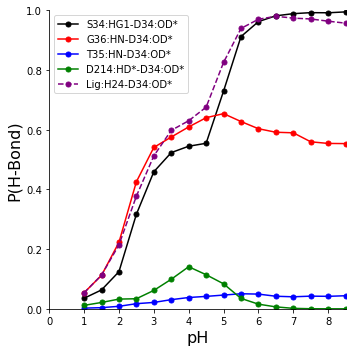

In [13]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,5))
fig.set_facecolor('white')

legends = ["S34:HG1-D34:OD*", "G36:HN-D34:OD*", "T35:HN-D34:OD*", "D214:HD*-D34:OD*", "Lig:H24-D34:OD*"]

axes.set_xlabel('pH', fontsize=16)
axes.set_ylabel('P(H-Bond)', fontsize=16)
axes.plot([x[0] for x in final_data], [y[1] for y in final_data], 'ko-', markersize = 5)
axes.plot([x[0] for x in final_data], [y[2] for y in final_data], 'ro-', markersize = 5)
axes.plot([x[0] for x in final_data], [y[3] for y in final_data], 'bo-', markersize = 5)
axes.plot([x[0] for x in final_data], [y[4] for y in final_data], 'go-', markersize = 5)
axes.plot([x[0] for x in final_data], [y[11] for y in final_data], 'o--', markersize = 5, color='Purple')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.legend(legends)
axes.set_ylim(0, 1)
axes.set_xlim(0, 8.5)


fig.tight_layout()
plt.savefig("HB_D34.pdf")
plt.show()

Save Data

In [18]:
with open('SI_indiv_hbonds_if_D34_holo_stage21_to_42.dat', 'w') as o:
    o.write('#pH S34:HG1-D34:OD*, "G36:HN-D34:OD*, T35:HN-D34:OD*, D214:HD*-D34:OD*, Lig:H24-D34:OD*\n')
    for dat in final_data:
        o.write('{dat[0]:0.1f} {dat[1]:0.2f} {dat[2]:0.2f} {dat[3]:0.2f} {dat[4]:0.2f} {dat[11]:0.2f} \n')

## H-Bonding to D214

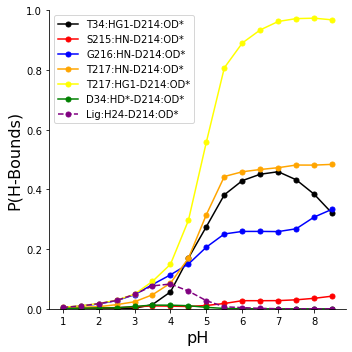

In [14]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,5))
fig.set_facecolor('white')

legends = ["T34:HG1-D214:OD*", "S215:HN-D214:OD*", "G216:HN-D214:OD*", "T217:HN-D214:OD*", "T217:HG1-D214:OD*", "D34:HD*-D214:OD*", "Lig:H24-D214:OD*"]

axes.set_xlabel('pH', fontsize=16)
axes.set_ylabel('P(H-Bounds)', fontsize=16)
axes.plot([x[0] for x in final_data], [y[5] for y in final_data], 'ko-', markersize = 5)
axes.plot([x[0] for x in final_data], [y[6] for y in final_data], 'ro-', markersize = 5)
axes.plot([x[0] for x in final_data], [y[7] for y in final_data], 'bo-', markersize = 5)
axes.plot([x[0] for x in final_data], [y[8] for y in final_data], 'o-', markersize = 5, color='Orange')
axes.plot([x[0] for x in final_data], [y[9] for y in final_data], 'o-', markersize = 5, color='Yellow')
axes.plot([x[0] for x in final_data], [y[10] for y in final_data], 'o-', markersize = 5, color='Green')
axes.plot([x[0] for x in final_data], [y[12] for y in final_data], 'o--', markersize = 5, color='Purple')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.legend(legends)
axes.set_ylim(0, 1)


fig.tight_layout()
plt.savefig("HB_D214_p1.pdf")
plt.show()

Save Data

In [19]:
with open('SI_indiv_hbonds_if_D214_holo_stage21_to_42.dat', 'w') as o:
    o.write('#pH S34:HG1-D34:OD*, "G36:HN-D34:OD*, T35:HN-D34:OD*, D214:HD*-D34:OD*, Lig:H24-D34:OD*\n')
    for dat in final_data:
        o.write('{dat[0]:0.1f} {dat[5]:0.2f} {dat[6]:0.2f} {dat[7]:0.2f} {dat[8]:0.2f} {dat[9]:0.2f} {dat[10]:0.2f} {dat[12]:0.2f}\n')

# Start of time series plotting

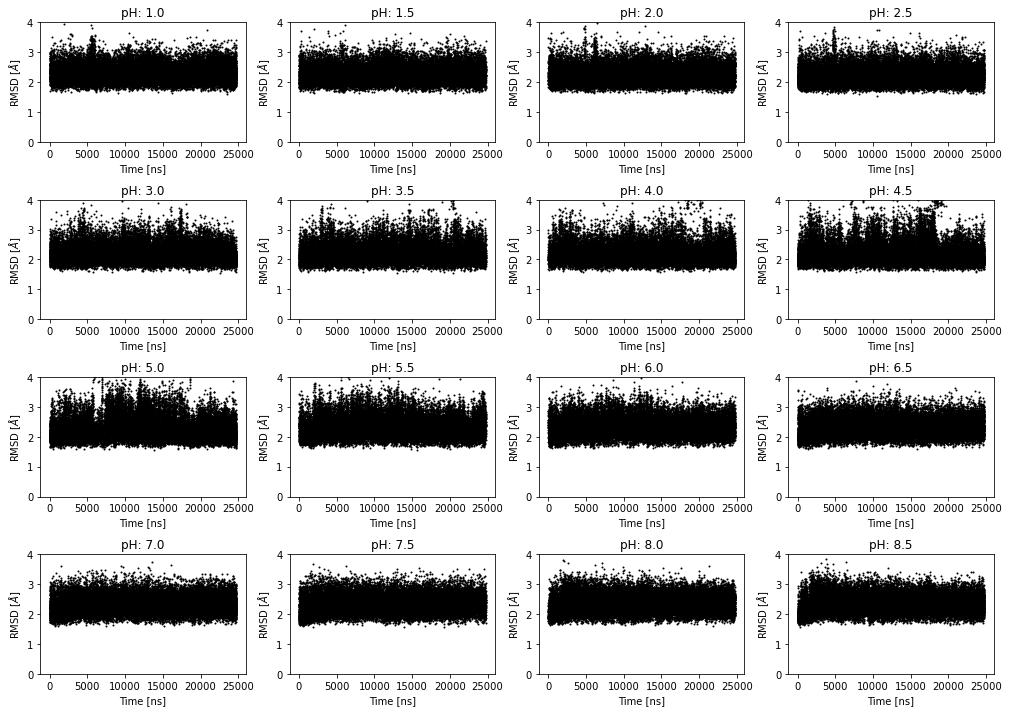

In [15]:
# Fold Cell
plt.close('all')

figrows = math.ceil(len(phs)/4)
figcols = 4
fig, axes = plt.subplots(nrows = figrows, ncols = figcols, figsize= (14,10/figcols*figrows))
fig.set_facecolor('white')

for i in range(figrows):
    for j in range(figcols):
        index = i * figcols + j
        if index < len(phs):
            axes[i, j].set_xlabel('Time [ns]')
            axes[i, j].set_ylabel('RMSD [$\AA$]')
            axes[i, j].set_title('pH: {}'.format(phs[index]))
            axes[i, j].plot([x[0] for x in data[index]], [y[6] for y in data[index]], 'k.', markersize = 2)
            axes[i, j].set_ylim(0, 4)
        else:
            axes[i, j].remove()

fig.tight_layout()
plt.savefig("time_series.pdf")
plt.show()